<h1>Cuenca de Providencia</h1> 
    <h3>Modelos hidrológicos grj4 y milc </h3>
    <h3> Integrantes:</h3>
    <t1> Juan Miguel Víquez </t1>
        <t1> Katherine Urbina </t1>
            <t1> Esmeralda Vargas</t1>
                <t1> Dania Zúñiga </t1>
        

<h3> Características generales: geofísicas y geológicas</h3>
<t1> La subcuenca Providencia se ubica en la cuenca del Río Savegre. La cuenca del Río Savegre tiene un área de drenaje de 603, 73 km2. La parte alta de la cuenca corresponde a la subcuenca Providencia que es drenada por el río Brujo.</t1>

<t1>Las unidades geológicas de la subcuenca corresponden a rocas ígneas y rocas sedimentarias (Rojas, 2011). Las rocas ígneas se caracterizan por una permeabilidad cercana  a 0 cuando se encuentran en un estado inalterado (Coppo, et al. 2012)</t1>

<t1>El bosque pluvial montano y el bosque muy húmedo montano bajo son las zonas de vida ubicadas en la subcuenca Providencia (Rojas, 2011). Esta subcuenca se caracteriza por encontrarse dentro del manejo de área protegida, pues una importante área de la misma está dentro del Parque Nacional Los Quetzales. </t1>

<t1>Sus características climatológicas indican que existe un promedio de precipitación anual de 2000 - 4000 mm al año, con una época lluviosa que se extiende desde abril a diciembre y una época seca de enero a marzo. En cuanto a la temperatura media anual en la subcuenca se encuentra de 8 a 12°C. La evapotranspiración anual es de aproximadamente 1000 m (Rojas, 2011).</t1>

<t1>Entre las actividades productivas de la subcuenca se destacan el ecoturismo y las plantaciones de café. A nivel turístico existe un importante desarrollo económico debido al parque nacional mencionado.</t1>




    

<h1>MAPA<h1>

<h3>Modelo GR4J para la cuenca de Providencia</h3>

<t1> Paquetes utilizados</t1>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gr4j_model import* 
from milc_model import *
import metrics as ms
import model_evaluation as me

from scipy.optimize import minimize

# Para activar a graficas interactivas reemplazar "inline" por "qt"
%matplotlib inline

<t1>Datos generales de la cuenca<t1>

In [5]:
area    = 122   # area en km2
latitud = 9.57   # latitud aprox de la cuenca

<t1> Series de tiempo extraídas de climate engine<t1>

In [6]:
 datos = pd.read_csv("./all_gr4j.csv", index_col=[0], parse_dates=[0])

<t1> Obetención de los datos de caudal<t1>

In [7]:
area = 122   # area de la cuenca en km2
qobs = datos["qt"] 

<h1>Modelo GR4J</h1>
<t2>El modelo GR4J (Génie Rural à 4 paramèters Journalier), es un modelo de 4 parámetros, basado en la cuantificación de la humedad del suelo.

https://www.ina.gob.ar/congreso_hidraulica/resumenes/LADHI_2018_RE_216.pdf

El modelo GR4J es uno de los modelos más simples y se ha demostrado que **tiene la capacidad de simular el proceso de precipitación-escorrentía en el paso del tiempo diario**. Este modelo ha sido ampliamente utilizado en la simulación secuencial de la humedad del suelo y los datos del flujo en modelos conceptuales de precipitación-escorrentía obteniendo resultados muy satisfactorios.

En la modelación hidrológica, la función objetivo más comúnmente utilizada es la métrica de Eficiencia de Nash-Sutcliffe que minimiza el error cuadrático medio entre los flujos de flujo modelados y observados, métrica usada por los modelos en estudio GR2M y GR4J. La validación tiene un sentido mucho más estricto que se le atribuye al proceso de demostrar la capacidad del modelo para desempeñarse fuera de su período de capacitación
**El modelo GR4J es sencillo de aplicar en comparación con modelos más complejos de entender, debido a que con estos no se tiene control de todas las variables y parámetros. A su vez la cantidad de parámetros que tiene el modelo GR4J hace que este sea más sencillo de optimizar y aumenta significativamente su eficiencia.**

“GR4J es uno de los modelos hidrológicos más utilizados en el mundo, por su sencillez y buen desempeño (Li et al., 2014);
    
El modelo GR4J generalmente reacciona a estimaciones deficientes de la precipitación en el área de referencia disminuyendo los parámetros GR4J X1 y X3 mientras aumenta el parámetro X2 .
La mayoría de las veces,los parámetros X1, X2 y X3 también son sensibles a la sobreestimación y subestimación de la entrada de lluvia de referencia. **El modelo GR4J reacciona a la sobreestimación de la precipitación superficial ( es decir, valores del índice BALANCE mayores a uno) aumentando el parámetro de producción X3 simulando mayores pérdidas de agua**.
El parámetro X4 que se relaciona con el tiempo de respuesta de la cuenca es casi insensible al cambio en la entrada de lluvia de referencia <t2>
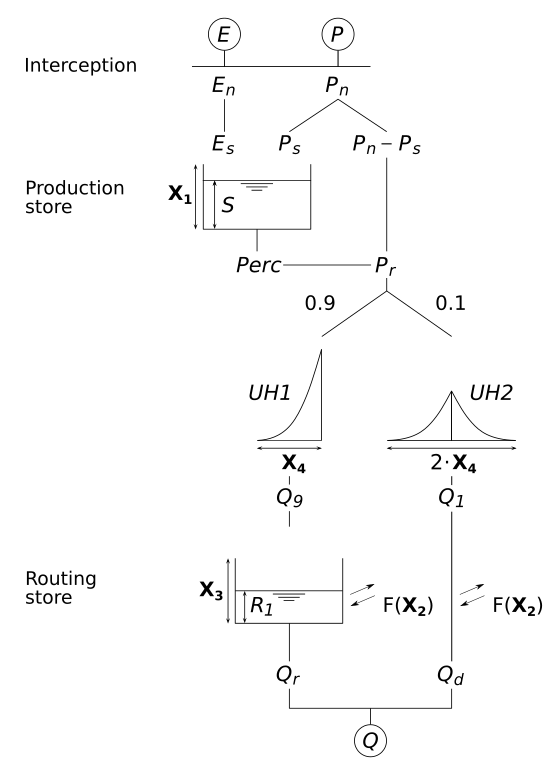
    


In [8]:
model = GR4J(area, latitud)
print(model)



______________GR4J structure______________
Catchment properties:
    Area (km2): 122.000
    Latitude  : 9.5700
Model Parameters:
    x1  > Maximum production capacity (mm)     : 1.000
    x2  > Discharge parameter (mm)             : 1.000
    x3  > Routing maximum capacity (mm)        : 1.000
    x4  > Delay (days)                         : 1.000
    ps0 > Initial production storage (psto/x1) : 1.000
    rs0 > Initial routing storage (rsto/x3)    : 0.500



<h2>Calibración manual<h2>

Metricas del modelo
Calibración KGE: 0.772, NSE: 0.541
 Validación KGE: 0.689, NSE: 0.430


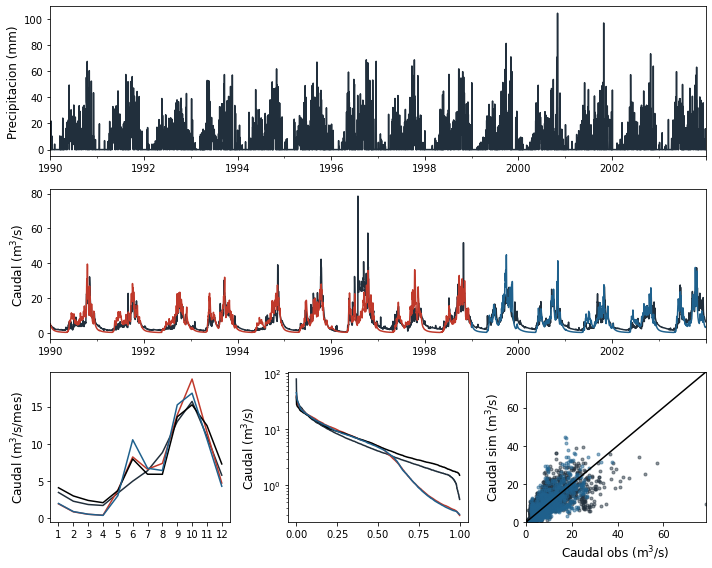

In [9]:

x1=200
x2=-3.204325
x3=500
x4=2.354539
ps0=0.5
rs0=0.5


# Fechas para dividir periodos de calibracion y validacion
fecha1 = "1990-01-01"   # fecha inicial calibracion
fecha2 = "1999-01-01"   # fecha final calibracion, inicial validacion
fecha3 = "2003-12-31"   # fecha final validacion

################# SIMULACION CON EL MODELO ###########################
######### EN ESTA INSTRUCCION DEBEN MODIFICAR LA XXXX POR CADA PARAMETRO, COMO SE HIZO EN CLASE CON EL OTRO MODELO
simulacion = model.run(datos, x1=x1,x2=x2,x3=x3,x4=x4,ps0=ps0,rs0=rs0)
qsim = simulacion.Qt

# Evaluacion del modelo
# calibracion
qobs_cal = qobs.loc[fecha1:fecha2]
qsim_cal = qsim.loc[fecha1:fecha2]
kge_cal = ms.kling_gupta_efficiency(qobs_cal, qsim_cal)
nse_cal = ms.nash_sutcliffe_efficiency(qobs_cal, qsim_cal)
# validacion
qobs_val = qobs.loc[fecha2:fecha3]
qsim_val = qsim.loc[fecha2:fecha3]
kge_val = ms.kling_gupta_efficiency(qobs_val, qsim_val)
nse_val = ms.nash_sutcliffe_efficiency(qobs_val, qsim_val)

print("Metricas del modelo")
print("Calibración KGE: {:.3f}, NSE: {:.3f}".format(kge_cal, nse_cal))
print(" Validación KGE: {:.3f}, NSE: {:.3f}".format(kge_val, nse_val))

# Graficar evaluacion
prec = datos.prec  # extraer precipitacion
fig, ax = me.plot_model_evaluation(prec, qobs, qsim, fecha1, fecha2, fecha3)

<H2>Análisis de Sensibilidad GRJ4<h2>

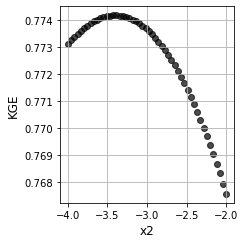

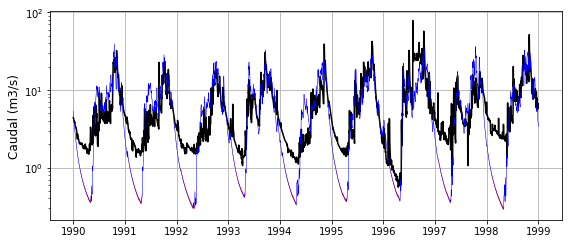

In [11]:
parametros = {
    "x1":210,
    "x2": -3.20179,
    "x3": 500,
    "x4": 2.452717,
    "ps0": 0.5,
    "rs0": 0.5,
}

# Fechas para dividir periodos de calibracion y validacion
fecha1 = "1990-01-01"   # fecha inicial calibracion
fecha2 = "1999-01-01"   # fecha final calibracion, inicial validacion

# Crear modelo con valores iniciales
modelo = GR4J(area, latitud, params=parametros)


################# SIMULACIONES AL VARIAR UN PARAMETRO ###########################
vmin      = -4      # valor minimo
vmax      = -2       # valor maximo
muestras  = 50        # numero de elementos
parametro = "x2"   # nombre del parametro que vamos a modificar


simulaciones  = []    # aqui vamos a guardar las simulaciones de caudal
errores       = []    # aqui vamos a guardar los valores del error
valores_param = np.linspace(vmin, vmax, muestras)  # este es nuestro vector de parametro que vamos a cambiar 

for valor in valores_param:
    # Simulamos unicamete para el periodo de calibracion
    # Modificamos unicamente el parametro que nos interesa
    nuevo_parametro = {parametro: valor}
    sim = modelo.run(datos.loc[fecha1:fecha2, :], **nuevo_parametro)
    qsim = sim.Qt

    # Evaluacion del modelo para el periodo de calibracion
    qobs = qobs.loc[fecha1:fecha2]
    kge  = ms.kling_gupta_efficiency(qobs, qsim)
    
    # Guardar elementos
    errores.append(kge)
    simulaciones.append(qsim)

# Crear dataframe de simulaciones
qsim = pd.concat(simulaciones, axis=1)   # unir en columnas
errores = np.array(errores)              # convertir a array

# Graficar variacion del error
fig1, ax1 = plt.subplots(figsize=(3.5, 3.5))
ax1.scatter(valores_param, errores, color="k", alpha=0.7)
ax1.set_xlabel(parametro, fontsize=12)
ax1.set_ylabel("KGE", fontsize=12)
ax1.grid(True)

fig1.tight_layout()

# Graficar series de tiempo
fig2, ax2 = plt.subplots(figsize=(8, 3.5))
qminimo = qsim.min(axis=1)  # minimo para cada renglon
qmedio  = qsim.mean(axis=1) # promedio para cada renglon
qmaximo = qsim.max(axis=1)  # maximo para cada renglon

fechas = qsim.index.to_pydatetime()
ax2.fill_between(fechas, qminimo, qmaximo, facecolor="r", alpha=0.8)
ax2.plot(fechas, qobs, color="k", label="Observado")
ax2.plot(fechas, qmedio, color="b", linewidth=0.5, label="Promedio simulado")
ax2.set_ylabel("Caudal (m3/s)", fontsize=12)
ax2.grid(True)
ax2.set_yscale("log")

fig2.tight_layout()

<h2>Monte Carlo MILc<h2>

,x2,x4,kge
224,-3.434994,2.432470,0.774195
3,-3.390253,2.417968,0.774194
731,-3.390323,2.398775,0.774183
502,-3.503844,2.402282,0.774162
495,-3.470099,2.516060,0.774113
770,-3.554439,2.382297,0.774110
682,-3.553579,2.479175,0.774100
393,-3.348307,2.351075,0.774099
785,-3.381408,2.536820,0.774098
540,-3.546927,2.490380,0.774093


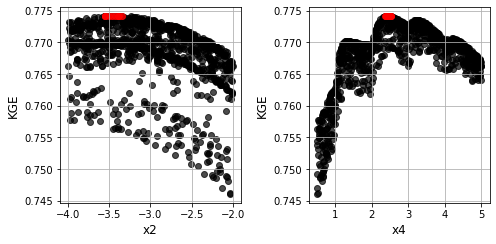

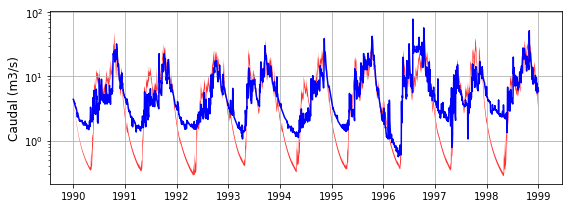

In [12]:
################# CREAR MODELO BASE ###########################
# Definicion de parametros
parametros_iniciales = {
    "x1":210,
    "x2": -3.20179,
    "x3": 500,
    "x4": 2.452717,
    "ps0": 0.5,
    "rs0": 0.5,
}

# Fechas para dividir periodos de calibracion y validacion
fecha1 = "1990-01-01"   # fecha inicial calibracion
fecha2 = "1999-01-01"   # fecha final calibracion, inicial validacion

# Crear modelo con valores iniciales
modelo = GR4J(area, latitud, params=parametros_iniciales)


################# SIMULACIONES AL VARIAR UN PARAMETRO ###########################
muestras   = 1000       # numero de elementos
mejores_resultsdos = 10  # numero de los mejores resultados a mostrar
# diccionario con los parametros que queremos modificar
# indicar parametro: (vmin, vmax)
parametros = {
    "x2": (-4, -2),
    "x4": (0.5, 5),
}


npar = len(parametros) # numero de parametros que seran modificados
simulaciones  = []     # aqui vamos a guardar las simulaciones de caudal
errores       = []     # aqui vamos a guardar los valores del error

# Crear matrices vacias para guardar los parametros generados
# valores de parametros para graficar
valores_aleatorios = pd.DataFrame(
    np.zeros((muestras, npar)),
    columns=parametros.keys()
)
# valores de parametros durante iteracion
nuevo_parametro = {}
for key in parametros.keys():
    vmin = parametros[key][0]
    vmax = parametros[key][1]
    valores_aleatorios.loc[:, key] = np.random.uniform(vmin, vmax, muestras)
    
    nuevo_parametro[key] = 0.0

    
for i in range(muestras):
    # Simulamos unicamete para el periodo de calibracion
    for key in parametros.keys():
        # guardar valores para simular
        nuevo_parametro[key] = valores_aleatorios.loc[i, key]
    
    # Simulamos unicamete para el periodo de calibracion
    sim = modelo.run(datos.loc[fecha1:fecha2, :], **nuevo_parametro)
    qsim = sim.Qt

    # Evaluacion del modelo para el periodo de calibracion
    qobs = qobs.loc[fecha1:fecha2]
    kge  = ms.kling_gupta_efficiency(qobs, qsim)
    
    # Guardar elementos
    errores.append(kge)
    simulaciones.append(qsim)

# Crear dataframe de simulaciones
qsim = pd.concat(simulaciones, axis=1)   # unir en columnas
valores_aleatorios["kge"] = np.array(errores) # agregar columna con el error
# ordenar parametros de mayor a menor kge
parametros_ordenados = valores_aleatorios.sort_values(by="kge", ascending=False)
parametros_ordenados = parametros_ordenados.iloc[:mejores_resultsdos, :]

# Graficar variacion del error
ancho = 3.5 * npar
fig, ax = plt.subplots(ncols=npar, figsize=(ancho, 3.5))
ax = ax.flatten()
for i in range(npar):
    parametro = valores_aleatorios.columns[i]
    # graficar todos los parametros
    ax[i].scatter(
        valores_aleatorios.loc[:, parametro],   # valores en x
        valores_aleatorios.loc[:, "kge"],       # valores en y
        color="k",                              # color de puntos
        alpha=0.7                               # transparencia
    )
    # graficar parametros de mejor ajuste
    ax[i].scatter(
        parametros_ordenados.loc[:, parametro], # valores en x
        parametros_ordenados.loc[:, "kge"],     # valores en y
        color="r",                              # color de puntos
        alpha=0.8                               # transparencia
    )
    
    ax[i].set_xlabel(parametro, fontsize=12)
    ax[i].set_ylabel("KGE", fontsize=12)
    ax[i].grid(True)

fig.tight_layout()    

# Graficar series de tiempo
fig2, ax2 = plt.subplots(figsize=(8, 3))
qminimo = qsim.min(axis=1)  # minimo para cada renglon
qmedio  = qsim.mean(axis=1) # promedio para cada renglon
qmaximo = qsim.max(axis=1)# maximo para cada renglon

fechas = qsim.index.to_pydatetime()
ax2.fill_between(fechas, qminimo, qmaximo, facecolor="r", alpha=0.8)
ax2.plot(fechas,qobs,color="b", label="Observado")
#ax2.plot(fechas, qmedio, color="r", linewidth=0.5, label="Promedio simulado")
ax2.set_ylabel("Caudal (m3/s)", fontsize=12)
ax2.set_yscale("log")
ax2.grid(True)
fig2.tight_layout()

# Mostrar parametros de mejor ajuste
parametros_ordenados

<T1>Datos para modelo MILc<T1>

In [31]:
datosMILc = pd.read_csv("./all_milc.csv", index_col=[0], parse_dates=[0])
qobs= datosMILc["qt"] 

<H1>Modelo MILc</H1>
<h2>Características del modelo MILc </h2>
    <t1>El MILc está compuesto por el modelo de equilibrio suelo-agua (SWB) y el modelo lluvia-escurrimiento (R-R) que se utilizan para simular los patrones temporales de humedad del suelo y la descarga de inundaciones, respectivamente.

Según Brocca et al. (2013) el Modelo Hidrológico Agrupado en Continuo (MILC por sus siglas en italiano de Modello Idrologico Lumped in Continuo) es la versión agrupada del modelo Modelo Hidrológico Semi Distribuido en Continuo (MISDc por sus siglas en italiano de Modello Idrologico SemiDistribuito in continuo).

**Se le agregó una función de potencia no lineal entre el almacenamiento de humedad del suelo del modelo y el flujo base, componente para la simulación del flujo base para simular la descarga durante las condiciones no inundadas.**

En el 2013 el modelo estaba siendo utilizado por el Centro de protección civil para el estudio regional para la predicción de inundaciones en tiempo real.
Los parámetros necesarios para iniciar el modelo, son:

AWC0: índice de humedad histórico
Q0: descarga inicial

Sobre el modelo MISDc que dio origen al modelo MILc, se encuentran las siguientes características:
**Es un modelo continuo de lluvia-escorrentía que se utiliza para simular el hidrograma de descarga en la salida de la cuenca.**
El “Modello Idrologico SemiDistribuito in continuo” (MISDc) se desarrolló para la simulación de eventos de inundaciones en una escala de tiempo de media hora y consta de dos componentes el primero es un modelo de balance hídrico del suelo, que simula el patrón temporal de la humedad del suelo y establece las condiciones iniciales para el segundo componente, que es un modelo basado en eventos de lluvia escorrentía para la simulación del hidrograma de inundación. Los dos modelos son acoplados a través de una relación lineal simple que fue derivada de un monitoreo intenso de la actividad de la humedad del suelo y la escorrentía en cuencas experimentales del centro de Italia.
 </t1>

In [32]:
modelo_MILc = MILc(area, latitud)
print(modelo_MILc)



______________MILC structure______________
Catchment properties:
    Area (km2): 122.000
    Latitude  : 9.5700
Model Parameters:
    gamma > routing coefficient (adim)               : 1.000
    w0    > Initial Water Content (adim)             : 0.500
    wmax  > Maximum Water Capacity (mm)              : 1.000
    alpha > Runoff parameter (adim)                  : 1.000
    kc    > Vegetation/Crop Coeficient (adim)        : 1.000
    m     > Drainage exponent (adim)                 : 1.000
    ks    > Satured hydraulic conductivity (mm/hr)   : 1.000
    nu    > Fraction of drainage vs interflow (adim) : 1.000



<H2>Calibración Manual<h2>

Metricas del modelo
Calibración KGE: 0.692, NSE: 0.431
 Validación KGE: 0.681, NSE: 0.329


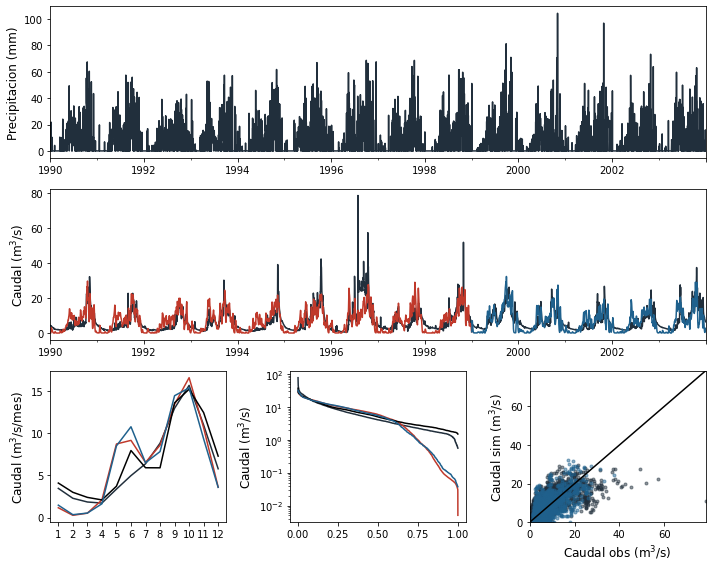

In [33]:
################# DATOS DEL USUARIO ###########################
# Definicion de parametros
gamma = 20
w0    = 0.514597
wmax  = 1250
alpha = 1.1
kc    = 0.5
ks    = 1.1
m     =5
nu    = 0.952373
# Fechas para dividir periodos de calibracion y validacion
fecha1 = "1990-01-01"   # fecha inicial calibracion
fecha2 = "1999-01-01"   # fecha final calibracion, inicial validacion
fecha3 = "2003-12-31"   # fecha final validacion

################# SIMULACION CON EL MODELO ###########################
simulacion = modelo_MILc.run(datosMILc, gamma=gamma, w0=w0, wmax=wmax, alpha=alpha, kc=kc, ks=ks, m=m, nu=nu)
qsim = simulacion.Qt

# Evaluacion del modelo
# calibracion
qobs_cal = qobs.loc[fecha1:fecha2]
qsim_cal = qsim.loc[fecha1:fecha2]
kge_cal = ms.kling_gupta_efficiency(qobs_cal, qsim_cal)
nse_cal = ms.nash_sutcliffe_efficiency(qobs_cal, qsim_cal)
# validacion
qobs_val = qobs.loc[fecha2:fecha3]
qsim_val = qsim.loc[fecha2:fecha3]
kge_val = ms.kling_gupta_efficiency(qobs_val, qsim_val)
nse_val = ms.nash_sutcliffe_efficiency(qobs_val, qsim_val)

print("Metricas del modelo")
print("Calibración KGE: {:.3f}, NSE: {:.3f}".format(kge_cal, nse_cal))
print(" Validación KGE: {:.3f}, NSE: {:.3f}".format(kge_val, nse_val))

# Graficar evaluacion
prec = datosMILc.prec  # extraer precipitacion
fig, ax = me.plot_model_evaluation(prec, qobs, qsim, fecha1, fecha2, fecha3)

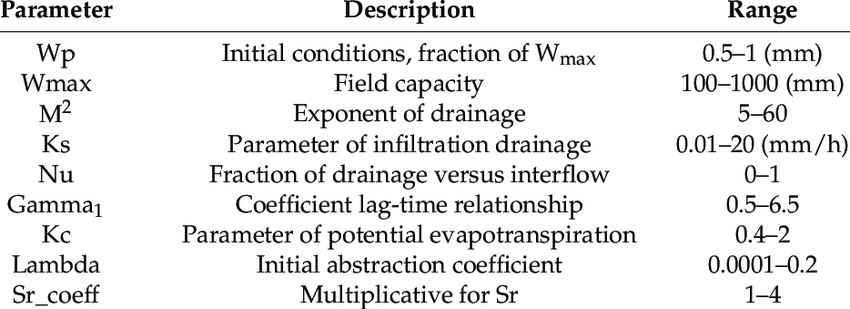

<H2>Análisis de Sensibilidad <h2>

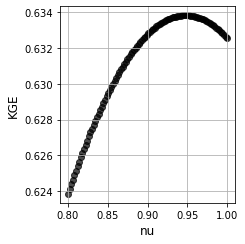

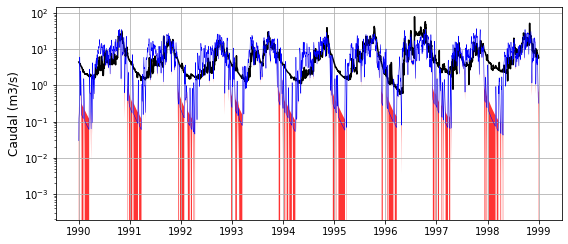

In [36]:
parametros = {
    "gamma": 10,
    "w0": 0.514597,
    "wmax": 900,
    "alpha": 1,
    "kc": 0.5,
    "ks": 1.6,
    "m": 5,
    "nu": 0.952373 
}

# Fechas para dividir periodos de calibracion y validacion
fecha1 = "1990-01-01"   # fecha inicial calibracion
fecha2 = "1999-01-01"   # fecha final calibracion, inicial validacion

# Crear modelo con valores iniciales
modelo = MILc(area, latitud, params=parametros)


################# SIMULACIONES AL VARIAR UN PARAMETRO ###########################
vmin      = 0.8    # valor minimo
vmax      = 1  # valor maximo
muestras  = 100        # numero de elementos
parametro = "nu"   # nombre del parametro que vamos a modificar


simulaciones  = []    # aqui vamos a guardar las simulaciones de caudal
errores       = []    # aqui vamos a guardar los valores del error
valores_param = np.linspace(vmin, vmax, muestras)  # este es nuestro vector de parametro que vamos a cambiar 

for valor in valores_param:
    # Simulamos unicamete para el periodo de calibracion
    # Modificamos unicamente el parametro que nos interesa
    nuevo_parametro = {parametro: valor}
    sim = modelo.run(datosMILc.loc[fecha1:fecha2, :], **nuevo_parametro)
    qsim = sim.Qt

    # Evaluacion del modelo para el periodo de calibracion
    qobs = qobs.loc[fecha1:fecha2]
    kge  = ms.kling_gupta_efficiency(qobs, qsim)
    
    # Guardar elementos
    errores.append(kge)
    simulaciones.append(qsim)

# Crear dataframe de simulaciones
qsim = pd.concat(simulaciones, axis=1)   # unir en columnas
errores = np.array(errores)              # convertir a array

# Graficar variacion del error
fig1, ax1 = plt.subplots(figsize=(3.5, 3.5))
ax1.scatter(valores_param, errores, color="k", alpha=0.7)
ax1.set_xlabel(parametro, fontsize=12)
ax1.set_ylabel("KGE", fontsize=12)
ax1.grid(True)

fig1.tight_layout()

# Graficar series de tiempo
fig2, ax2 = plt.subplots(figsize=(8, 3.5))
qminimo = qsim.min(axis=1)  # minimo para cada renglon
qmedio  = qsim.mean(axis=1) # promedio para cada renglon
qmaximo = qsim.max(axis=1)  # maximo para cada renglon

fechas = qsim.index.to_pydatetime()
ax2.fill_between(fechas, qminimo, qmaximo, facecolor="r", alpha=0.8)
ax2.plot(fechas, qobs, color="k", label="Observado")
ax2.plot(fechas, qmedio, color="b", linewidth=0.5, label="Promedio simulado")
ax2.set_ylabel("Caudal (m3/s)", fontsize=12)
ax2.grid(True)
ax2.set_yscale("log")

fig2.tight_layout()

<h2>Monte Carlo<h2>

,wmax,nu,kge
72,1208.235774,0.953452,0.688910
43,1208.713205,0.941348,0.688908
37,1213.317165,0.950210,0.688878
74,1209.481082,0.933807,0.688830
59,1223.453921,0.954895,0.688757
21,1209.458827,0.928178,0.688742
44,1232.595944,0.938675,0.688671
70,1202.638775,0.922226,0.688671
12,1237.692491,0.955526,0.688612
11,1215.228398,0.971941,0.688564


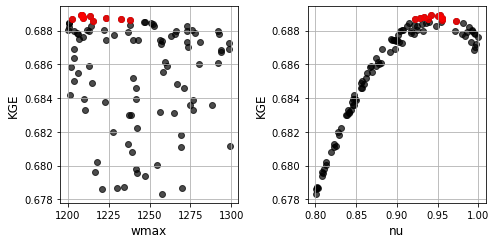

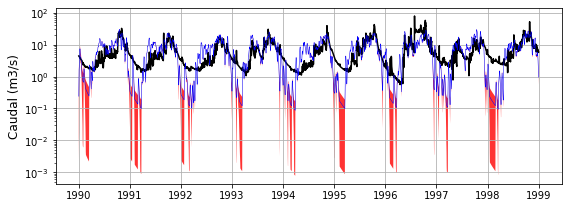

In [37]:
parametros_iniciales = {
    "gamma": 20,
    "w0": 0.95,
    "wmax": 900,
    "alpha": 1.1,
    "kc": 0.5,
    "ks": 1.1,
    "m": 5,
    "nu": 0.6
}

# Fechas para dividir periodos de calibracion y validacion
fecha1 = "1990-01-01"   # fecha inicial calibracion
fecha2 = "1999-01-01"   # fecha final calibracion, inicial validacion

# Crear modelo con valores iniciales
modelo = MILc(area, latitud, params=parametros_iniciales)


################# SIMULACIONES AL VARIAR UN PARAMETRO ###########################
muestras   = 100         # numero de elementos
mejores_resultsdos = 10  # numero de los mejores resultados a mostrar
# diccionario con los parametros que queremos modificar
# indicar parametro: (vmin, vmax)
parametros = {
    "wmax": (1200,1300),
    "nu": (0.8, 1),
}


npar = len(parametros) # numero de parametros que seran modificados
simulaciones  = []     # aqui vamos a guardar las simulaciones de caudal
errores       = []     # aqui vamos a guardar los valores del error

# Crear matrices vacias para guardar los parametros generados
# valores de parametros para graficar
valores_aleatorios = pd.DataFrame(
    np.zeros((muestras, npar)),
    columns=parametros.keys()
)
# valores de parametros durante iteracion
nuevo_parametro = {}
for key in parametros.keys():
    vmin = parametros[key][0]
    vmax = parametros[key][1]
    valores_aleatorios.loc[:, key] = np.random.uniform(vmin, vmax, muestras)
    
    nuevo_parametro[key] = 0.0

    
for i in range(muestras):
    # Simulamos unicamete para el periodo de calibracion
    for key in parametros.keys():
        # guardar valores para simular
        nuevo_parametro[key] = valores_aleatorios.loc[i, key]
    
    # Simulamos unicamete para el periodo de calibracion
    sim = modelo.run(datosMILc.loc[fecha1:fecha2, :], **nuevo_parametro)
    qsim = sim.Qt

    # Evaluacion del modelo para el periodo de calibracion
    qobs = qobs.loc[fecha1:fecha2]
    kge  = ms.kling_gupta_efficiency(qobs, qsim)
    
    # Guardar elementos
    errores.append(kge)
    simulaciones.append(qsim)

# Crear dataframe de simulaciones
qsim = pd.concat(simulaciones, axis=1)   # unir en columnas
valores_aleatorios["kge"] = np.array(errores) # agregar columna con el error
# ordenar parametros de mayor a menor kge
parametros_ordenados = valores_aleatorios.sort_values(by="kge", ascending=False)
parametros_ordenados = parametros_ordenados.iloc[:mejores_resultsdos, :]

# Graficar variacion del error
ancho = 3.5 * npar
fig, ax = plt.subplots(ncols=npar, figsize=(ancho, 3.5))
ax = ax.flatten()
for i in range(npar):
    parametro = valores_aleatorios.columns[i]
    # graficar todos los parametros
    ax[i].scatter(
        valores_aleatorios.loc[:, parametro],   # valores en x
        valores_aleatorios.loc[:, "kge"],       # valores en y
        color="k",                              # color de puntos
        alpha=0.7                               # transparencia
    )
    # graficar parametros de mejor ajuste
    ax[i].scatter(
        parametros_ordenados.loc[:, parametro], # valores en x
        parametros_ordenados.loc[:, "kge"],     # valores en y
        color="r",                              # color de puntos
        alpha=0.8                               # transparencia
    )
    
    ax[i].set_xlabel(parametro, fontsize=12)
    ax[i].set_ylabel("KGE", fontsize=12)
    ax[i].grid(True)

fig.tight_layout()    

# Graficar series de tiempo
fig2, ax2 = plt.subplots(figsize=(8, 3))
qminimo = qsim.min(axis=1)  # minimo para cada renglon
qmedio  = qsim.mean(axis=1) # promedio para cada renglon
qmaximo = qsim.max(axis=1)  # maximo para cada renglon

fechas = qsim.index.to_pydatetime()
ax2.fill_between(fechas, qminimo, qmaximo, facecolor="r", alpha=0.8)
ax2.plot(fechas, qobs, color="k", label="Observado")
ax2.plot(fechas, qmedio, color="b", linewidth=0.5, label="Promedio simulado")
ax2.set_ylabel("Caudal (m3/s)", fontsize=12)
ax2.set_yscale("log")
ax2.grid(True)
fig2.tight_layout()

# Mostrar parametros de mejor ajuste
parametros_ordenados

<H1>Resultados<h1>

<h2>GR4j<H2/>


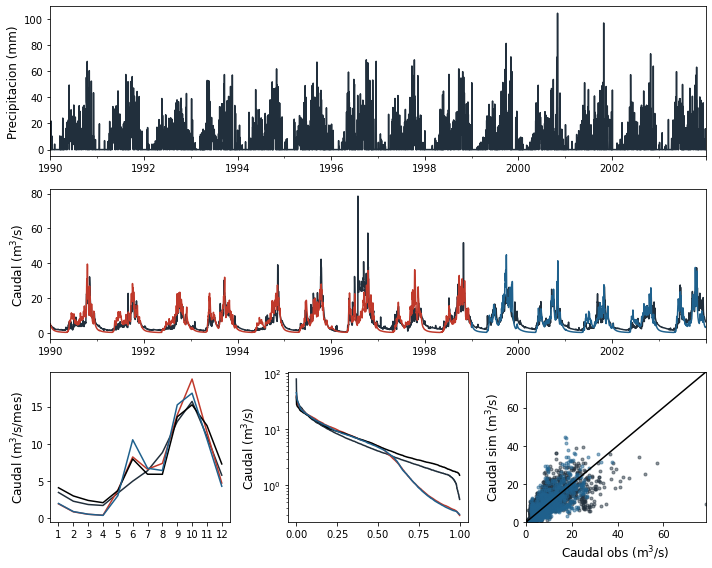


<h2>MILc<H2/>

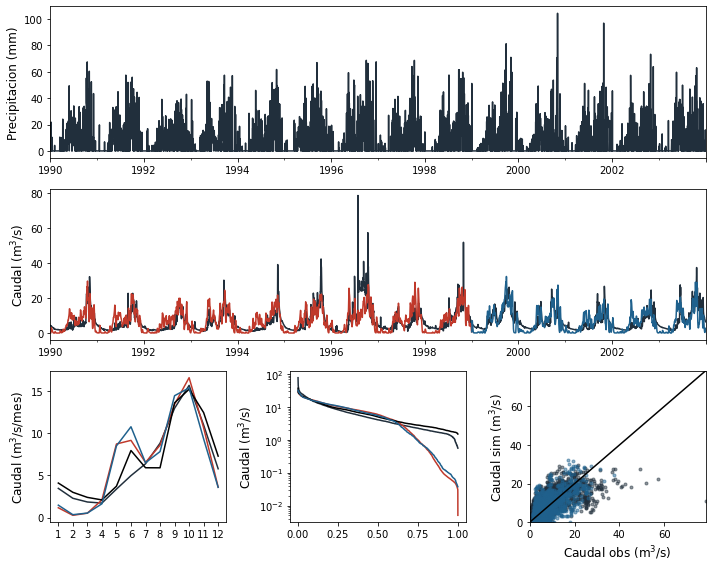